In [3]:
!pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]




[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. INTRODUCCION
El presente proyecto tiene como objetivo realizar un Análisis Exploratorio de Datos (EDA) sobre dos conjuntos de datos relacionados con campañas de marketing directo de una institución bancaria portuguesa.
Las campañas se desarrollaron mediante llamadas telefónicas con el fin de promocionar depósitos a plazo bancario. El objetivo principal del análisis es identificar los factores que influyen en la suscripción del producto financiero por parte de los clientes.
Para el desarrollo del proyecto se utilizaron las siguientes herramientas:
•	Python
•	Pandas
•	Matplotlib y Seaborn
•	Visual Studio Code con Jupyter Notebook


2 TRANSFORMACION Y LIMPIEZA DE DATOS

Durante la fase de preparación de datos se realizaron las siguientes acciones:
•	Eliminación de columnas irrelevantes que no aportaban valor analítico.
•	Corrección del formato decimal europeo en variables económicas (reemplazo de coma por punto).
•	Conversión de variables a su tipo de dato adecuado.
•	Identificación y tratamiento de valores nulos mediante imputación:
o	Mediana para variables numéricas.
o	Moda para variables categóricas.
•	Conversión de fechas a formato datetime.
•	Creación de una nueva variable denominada “Total_Children”, que agrupa el número total de hijos en el hogar.
•	Integración de ambos datasets mediante un merge tipo left.
Estas transformaciones permitieron obtener un dataset limpio, consistente y preparado para el análisis exploratorio.


2.1 Carga de datos

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
bank = pd.read_csv("bank-additional.csv")

customers_1 = pd.read_excel("customer-details.xlsx", sheet_name=0)
customers_2 = pd.read_excel("customer-details.xlsx", sheet_name=1)
customers_3 = pd.read_excel("customer-details.xlsx", sheet_name=2)

customers = pd.concat([customers_1, customers_2, customers_3], ignore_index=True)


In [21]:
#Visualizacion de las primeras filas
bank.head()


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,15-febrero-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,29-noviembre-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191,no,29-enero-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [16]:
customers.head()


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Total_Children
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,1
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,3
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3


In [22]:
#Dimensiones del dataset
bank.shape


(43000, 21)

In [23]:
customers.shape


(43170, 8)

In [24]:
#Informacion y tipo de datos
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         43000 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  float64
 15  cons.conf.idx   43000 non-null  float64
 16  euribor3m       43000 non-null  float64
 17  nr.employed     43000 non-null 

In [25]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
 7   Total_Children     43170 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.6+ MB


2.2 Limpieza del dataset principal

In [5]:
#Eliminamos columnas innecesarias
bank.drop(columns=["Unnamed: 0", "latitude", "longitude"], 
          inplace=True, errors="ignore")


In [6]:
#Modificamos formato decimal
comma_columns = ["cons.price.idx", "cons.conf.idx", "euribor3m"]

for col in comma_columns:
    if col in bank.columns:
        bank[col] = bank[col].astype(str).str.replace(",", ".", regex=False)
        bank[col] = pd.to_numeric(bank[col], errors="coerce")


In [7]:
#Eliminamos los valores nulos
bank["age"].fillna(bank["age"].median(), inplace=True)
bank["euribor3m"].fillna(bank["euribor3m"].median(), inplace=True)
bank["default"].fillna(bank["default"].mode()[0], inplace=True)


2.3 Limpieza del dataset secundario

In [8]:
customers["Dt_Customer"] = pd.to_datetime(customers["Dt_Customer"], errors="coerce")


In [11]:
#Creacion de nueva variable
customers["Total_Children"] = customers["Kidhome"] + customers["Teenhome"]


3 INTEGRACION DE LOS DATASETS

In [12]:
#Realizo un merge tipo left utilizando el identificador del cliente
merged = bank.merge(customers, left_on="id_", right_on="ID", how="left")


4 ANALISIS DESCRIPTIVO

El análisis descriptivo permitió identificar los siguientes aspectos relevantes:
•	El dataset presenta un desbalance significativo en la variable objetivo, predominando la respuesta negativa.
•	La edad media de los clientes que suscriben el producto es ligeramente superior a la de los que no lo hacen.
•	La duración de la llamada muestra una diferencia considerable entre clientes que suscriben y los que no.
•	Los clientes con mayor ingreso anual presentan mayor probabilidad de contratación.
•	La actividad digital (visitas web mensuales) parece estar asociada a una mayor predisposición a contratar productos financieros.
Asimismo, las variables macroeconómicas muestran cierta influencia en el comportamiento del cliente.


4.1 Estadisticas genelares

In [14]:
merged.describe()


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Total_Children
count,43000.000000,43000.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,42529.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000,43000.000000,43000.000000
mean,39.741698,0.000070,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,93.574219,-40.509049,3.883541,7935.478930,93241.200070,1.004791,0.998605,2013-05-12 07:05:06.083720960,16.589698,2.003395
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.466000,3615.000000,49610.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000,1.000000
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,7222.000000,93050.500000,1.000000,1.000000,2013-03-02 00:00:00,17.000000,2.000000
75%,46.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,11725.250000,136744.500000,2.000000,2.000000,2014-03-29 00:00:00,25.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,20114.000000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000,4.000000
std,9.817735,0.008352,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,0.579548,4.637186,1.621095,5225.658105,50498.316182,0.815913,0.815983,NaN,9.239205,1.153144


4.2 Modificamos la variable

In [26]:
merged["y"].value_counts()
merged["y"].value_counts(normalize=True) * 100


y
no     88.734884
yes    11.265116
Name: proportion, dtype: float64

4.3 Edad media por suscripcion

In [27]:
merged.groupby("y")["age"].mean()


y
no     39.640109
yes    40.541908
Name: age, dtype: float64

4.4 Ingreso medio por suscripcion

In [28]:
merged.groupby("y")["Income"].mean()


y
no     93324.595031
yes    92584.301197
Name: Income, dtype: float64

4.5 Duracion media de la llamada

In [29]:
merged.groupby("y")["duration"].mean()


y
no     220.430208
yes    551.621387
Name: duration, dtype: float64

5 VISUALIZACION DE LOS DATOS

Las representaciones gráficas reforzaron los resultados obtenidos en el análisis estadístico:
•	El gráfico de barras evidenció el desbalance en la variable objetivo.
•	Los histogramas mostraron la distribución de la edad de los clientes.
•	Los diagramas de caja permitieron observar diferencias claras en el ingreso según la suscripción.
•	La matriz de correlación mostró relaciones significativas entre variables numéricas, destacando la duración de la llamada como una de las variables más influyentes.
Las visualizaciones facilitaron la identificación de patrones y tendencias relevantes


5.1 Distribucion de la variable

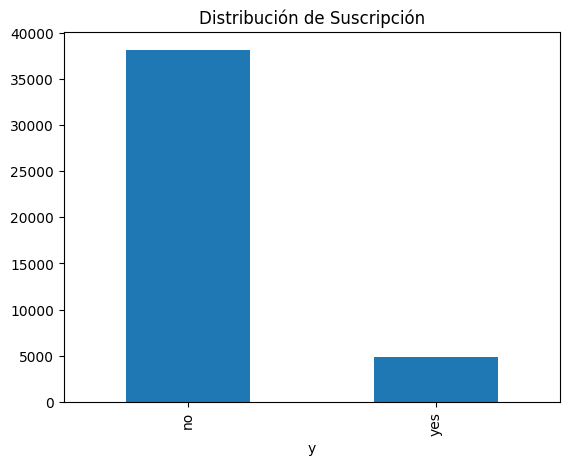

In [30]:
merged["y"].value_counts().plot(kind="bar")
plt.title("Distribución de Suscripción")
plt.show()


5.2 Distribucion por edad

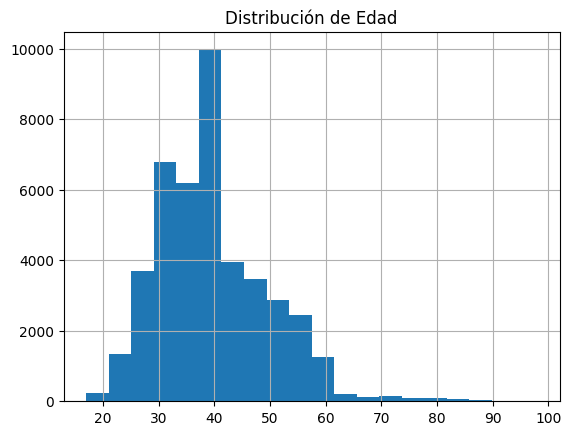

In [31]:
merged["age"].hist(bins=20)
plt.title("Distribución de Edad")
plt.show()


5.3 Ingreso vs Suscripcion

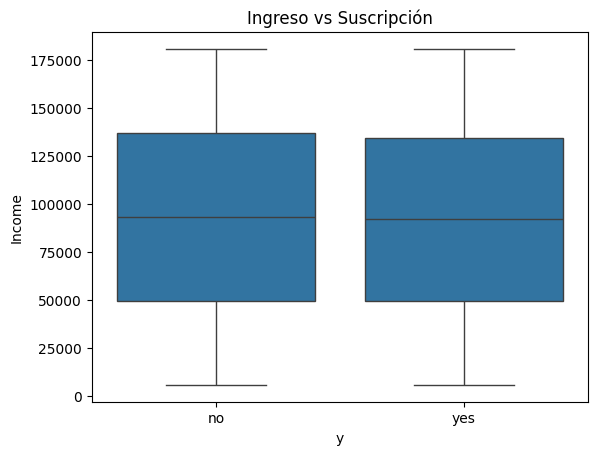

In [32]:
sns.boxplot(x="y", y="Income", data=merged)
plt.title("Ingreso vs Suscripción")
plt.show()


5.4 Matriz de correlacion

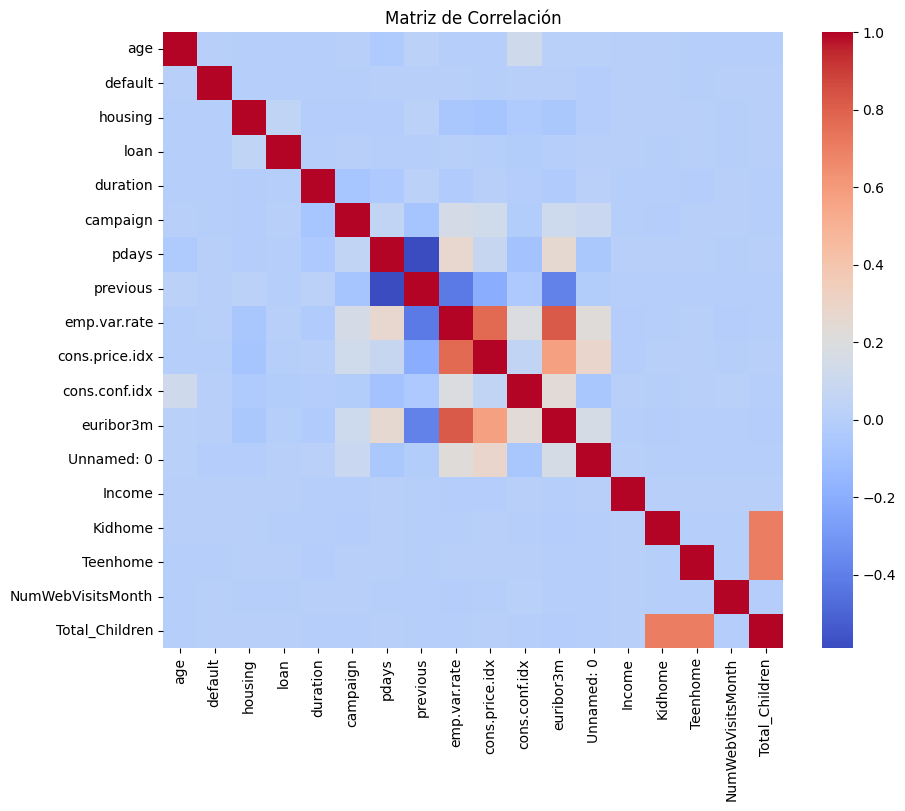

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(merged.corr(numeric_only=True), cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


6 CONCLUSION

A partir del análisis exploratorio realizado se concluye que:
1.	La duración de la llamada es el factor más determinante en la suscripción del depósito.
2.	El ingreso anual del cliente influye positivamente en la probabilidad de contratación.
3.	La edad presenta una relación moderada con la suscripción.
4.	La actividad digital puede estar asociada a una mayor predisposición a contratar productos financieros.
5.	El dataset presenta un desbalance de clases que deberá considerarse en futuros modelos predictivos.
